[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tuankhoin/COMP30027-Practical-Solutions/blob/main/2023/Week%208.ipynb)

###### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2023 

## Week 8 - Logistic Regression & Ensembles

___
## Theoretical questions


### 1.What is Logistic Regression? What is “logistic”? What are we “regressing”? 

The model uses linear regression to calculate the log odds of P(y=1|x) (from which we can trivially derive P(y=1|x). A logistic regression classifier additionally defines a ‘decision boundary’, which is typically set at 0.5. If the model predicts the probability P(Y=1|x) > 0.5, we classify x as class 1. Otherwise, x is classified as class 0. 

- Logistic: sigmoid function used in the model: $\sigma(z) = \frac{1}{1+e^{-z}}$
- We are regressing the log odds of p(y=1|x)

Logistic function has range [0,1] like probabilities, though it's not really a probability.

### 2. Build a logistic regression classifier, with $[\beta_0,\beta_1,\beta_2,\beta_3,\beta_4] = [0.2,0.3,−2.2,3.3,−0.2]$

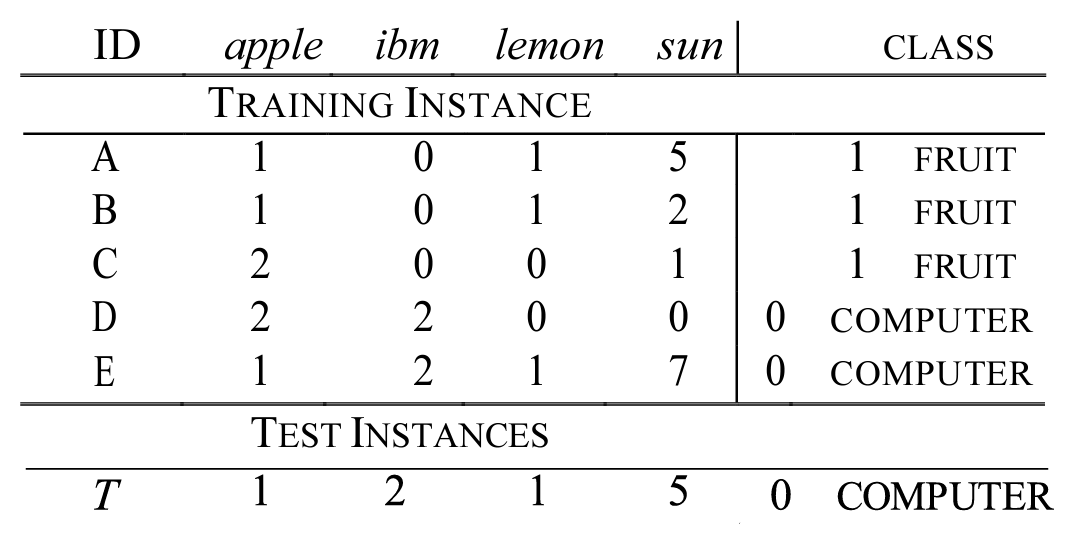

#### a. Explain the intuition behind the model parameters, and their meaning in relation to the features. 
> In this dataset we want identify if a piece of writing is about computer or fruit (e.g.  ‘new apple iPhone is very expensive’ vs. ‘an apple a day, keeps the doctor away’). To do so, we are using 4 terms (apple, ibm, lemon, sun) and the count of their occurrences in a piece of writing. So for example we know that Doc A includes apple once and sun five times.

#### b. Predict the test instance

- Step 1: Get the linear regression result: $z = 0.2+0.3×1+(−2.2)×2+3.3×1+(−0.2)×5 = -1.6$
- Step 2: Put result into sigmoid function: $P(1|T) = \sigma(-1.6) = \frac{1}{1+e^{1.6}} = 0.17$
- Step 2.5: Get the other 'probability': $P(0|T) = 1-0.17 = 0.83$
- Step 3: $P(1|T) < 0.5$ ▶ Result is 0 (`COMPUTER`)

#### c. Design a test to make sure that the Loss of our model, is lower when its prediction the correct label for test instance T, than when it’s predicting a wrong label.  
Likelihood equation: $-log[L(\beta)] = -\sum_i\Big[ y_i log(\sigma_i) + (1-y_i) log(1-\sigma_i)\Big]$ where $\sigma_i = \sigma(x_i;\beta)$

Answer:

Just substitute the retrieved probabilities $P(1|T)$ and $P(0|T)$ into the equation. Since we only have 1 instance, the summation is not needed:
- y=1: $-log[L(\beta)] = -\Big[ 1 \times log(0.17) + (1-1) \times log(1-0.17)\Big] = -log(0.17) = 1.77$
- y=0: $-log[L(\beta)] = -\Big[ 0 \times log(0.17) + (1-0) \times log(1-0.17)\Big] = -log(0.83) = 0.19$

So y=0 have smaller loss than y=1.

### 3. For the model created in question 2, compute a single gradient descent update for parameter $𝛽_1$ given the training instances given above. Set learning rate to $𝛼=0.1$
Recall that for each feature j, we compute its weight update as $\beta_j ⟵ \beta_j + \alpha\frac{\partial L(\beta)}{\partial \beta_j}$

Step 1: Get logistic function for all training instances:

$𝜎(𝑥_A;𝛽)=𝜎[0.2+0.3×1−2.2×0+3.3×1−0.2×5]=0.94$

Similarly:

Instance|$\sigma$
---|---
A|0.94
B|0.97
C|0.65
D|0.03
E|0.12

Step 2: Update

Quik mafs: $\frac{\partial L(\beta)}{\partial \beta_j} = \sum_{instances}\Big[(y-\sigma_{x;\beta})x_1\Big]$

$\beta_1 = 0.3−0.1[(0.94−1)×1+(0.97−1)×1+(0.65−1)×2+(0.03−0)×2 +(0.12−0)×1] = 0.3+0.061 = 0.361 $

### 4. Describe how to build Random Forrest for a given data?
- Randomly select a subset (k) of features (M) to use for training
- Using the selected features, construct a decision tree by randomly selecting N training instances with replacement similar to bagging.
- Combine the decision trees into a random forest by taking the majority vote of the individual trees.

#### a. What are the benefits of bagging?
Bagging helps to build uncorrelated decision trees.

#### b. What is the impact of the size of the number of trees in Random Forest?
Larger number of trees (assuming the trees are uncorrelated) reduce variance, but takes more time to train and classify. 

The complexity grows linearly with the number of trees. 

#### c. What will happen if the random number features chosen for splitting nodes in a Random Forest is very large? 
As the random number features chosen increases, correlation between the trees increases, the accuracy goes down. 

### 5. Under what circumstances we prefer stacking to boosting and bagging?
- Bagging reduce variance by training on different data subsets ▶ Too complex model will just overfit anyway, and you get a crap model.
- Boosting adjust weightings of the instances, increasing attention on misclassifications ▶ Too simple models will just repeat the mistakes again.
- Stacking reduce both bias and variance by stacking models trained with different algorithms ▶ Requires more computational resources and can be more complex to implement and tune than bagging or boosting.

Therefore, stacking may be preferred over bagging or boosting when: 
- Data is complex 
- We consider predictions from a diverse range of models. 

---
## Coding exercises

Today, we first examine **Logistic Regression** classifier. Then we will use many of the classifier models that we covered so far to build different ensembles and analyse the outputs.


In [ ]:
try:
  from google.colab import drive 
  drive.mount('/content/gdrive')
  path = "gdrive/My Drive/COMP30027 (T) 2023/week8/"
except:
  path = ''

Mounted at /content/gdrive


### Exercise 1. 
Let's start with *Logistic Regression*. In this exercise you are working with a dataset is called 'amphibians'. It is adopted from a famous public dataset. You can find more details about this dataset <a href= "https://archive.ics.uci.edu/ml/datasets/Amphibians#"> here </a>. The dataset include some information about 5 groups of amphibians in Poland: 'Green frogs', 'Brown frogs', 'Common toad', 'Tree frog' and 'Fire-bellied toad'. 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings


In [ ]:
data = pd.read_csv(path + "amphibians.data")

data.head(5)

,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,frog class
0,700,1,5,1,10,6,10,3,1,75,1,1,0,1,Brown frog
1,200,1,5,1,10,6,10,3,4,75,1,1,0,1,Brown frog
2,300,1,5,0,6,10,2,3,4,25,0,0,0,1,Common toad
3,600,2,1,4,10,2,6,0,0,99,0,5,0,1,Brown frog
4,500,1,5,0,6,6,10,1,2,25,0,0,0,2,Common toad


In [ ]:
# Seprating features and the target class

y = data.iloc[:, -1] #all the columns except the last one
X = data.iloc[:, :-1] # the last column

We are going to assign 2/3 of the data to train oour model and 1/3 for testing it. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30027)

Let's fisrt check the distribution of the data in test and train dataset.

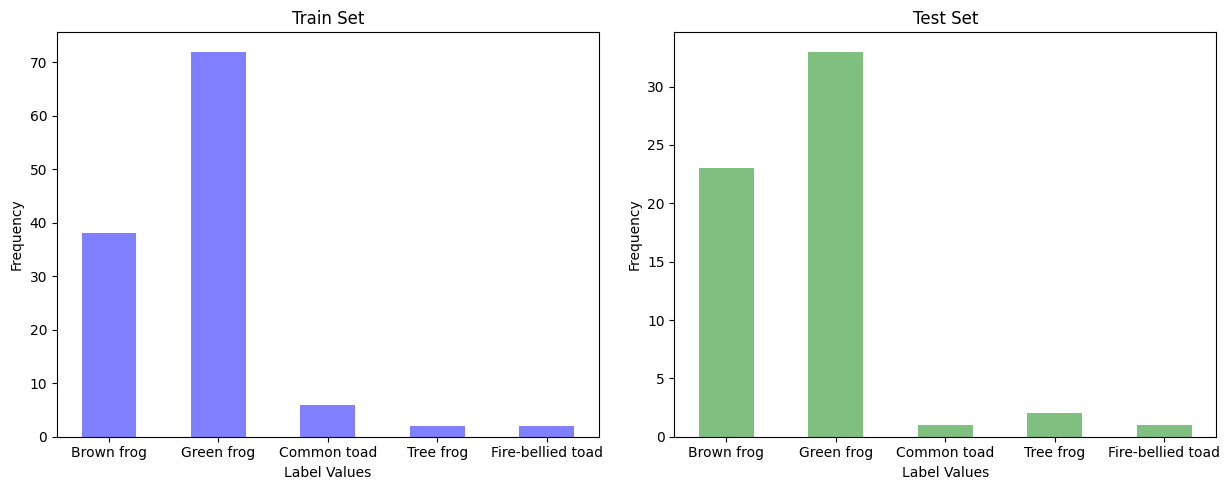

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12.5, 5))

# Plot histogram for the train set on the left subplot
axs[0].hist(y_train.values.flatten(), bins=np.arange(6)-0.5, alpha=0.5, color='blue', rwidth=0.5)
axs[0].set_xlabel('Label Values')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Train Set')

# Plot histogram for the test set on the right subplot
axs[1].hist(y_test.values.flatten(), bins=np.arange(6)-0.5, alpha=0.5, color='green', rwidth=0.5)
axs[1].set_xlabel('Label Values')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Test Set')

# Display the plot
plt.tight_layout()
plt.show()

Now we are going to train and test a Logistic Regression model based on these testing and training sets.

In [ ]:
# Fact: many sklearn models have an argument called verbose to keep track of the training process, and n_jobs to do parallel processing
lgr = LogisticRegression(verbose=1,n_jobs=2)
#train the model using the training set
lgr.fit(X_train,y_train)
#test the model using the testing set
print("Accuracy:",lgr.score(X_test,y_test))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy: 0.7333333333333333


[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.1s finished


The default value for the `max_iter` parameter in the `LogisticRegression()` function in `scikit-learn` is 100. This means that if the optimization algorithm does not converge after 100 iterations, it will stop and return a warning message.

Depending on the complexity of the problem and the size of the dataset, you may need to increase the value of `max_iter` to allow the algorithm to converge to a solution. However, setting `max_iter` too high may also lead to overfitting and longer computation times. Therefore, it is important to experiment with different values and find the optimal setting for your specific problem.
    
We can run a Grid Search to find the optimum value for the `max_iter` parameter.

In [ ]:
from sklearn.model_selection import GridSearchCV

warnings.simplefilter(action='ignore', category=UserWarning)

# Define the parameter grid to search over
param_grid = {'max_iter': [100, 500, 1000, 5000, 10000]}

# Create a logistic regression classifier
lgr = LogisticRegression()

print("This will take a while. Be Patient!")

# Use GridSearchCV to find the best max_iter value
grid_search = GridSearchCV(lgr, param_grid, cv=3, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy score
print("Best max_iter value:", grid_search.best_params_['max_iter'])
print("Accuracy:", grid_search.score(X_test, y_test))



This will take a while. Be Patient!
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END .......................................max_iter=100; total time=   0.0s
[CV] END .......................................max_iter=100; total time=   0.0s
[CV] END .......................................max_iter=100; total time=   0.0s
[CV] END .......................................max_iter=500; total time=   0.2s
[CV] END .......................................max_iter=500; total time=   0.2s
[CV] END .......................................max_iter=500; total time=   0.2s
[CV] END ......................................max_iter=1000; total time=   0.3s
[CV] END ......................................max_iter=1000; total time=   0.2s
[CV] END ......................................max_iter=1000; total time=   0.2s
[CV] END ......................................max_iter=5000; total time=   0.9s
[CV] END ......................................max_iter=5000; total time=   1.0s
[CV] END ....

As explained in the lectures Logistic Regression is binary classifier. But in this dataset we have five lables. Similar to SVM models Logistic Regression needs to use either one-vs-one or one-vs-all strategy to work on multi-class dataset.
The default strategy is using one-vs-all (one-vs-rest) strategy. In this strategy, the number of models that need to be built by Logistic Regression is equal to the number of classes in the dataset. For example, in our dataset with five classes, five different binary logistic regression models need to be trained, each one designed to distinguish between one of the classes and the others.

In [ ]:
lgr = LogisticRegression(max_iter = 1000)
lgr.fit(X_train,y_train)
# Get the weights of each feature
weights = lgr.coef_
print(f"Feature weights, with shape of {weights.shape}:\n", weights)

Feature weights, with shape of (5, 14):
 [[ 1.36555890e-04 -7.82575877e-02  1.59237752e-01 -6.03544314e-02
   4.33652277e-02 -1.23023413e-02  1.29075012e-01 -1.56825735e-01
  -5.74833793e-02  1.01387741e-02 -2.43507282e-01  1.52804705e-01
  -1.25654576e-01 -8.48740512e-02]
 [-1.04792656e-03  4.43971868e-02  1.47370883e-01  6.67965072e-03
  -5.26990711e-02  1.93160722e-02  2.28346175e-01  1.16289255e-01
   1.26133244e-01 -1.82830483e-02  9.58843430e-02 -5.45399623e-02
  -4.07133557e-02  5.32055411e-02]
 [ 3.17172790e-04 -5.52563283e-02 -2.15118483e-01  3.69851776e-02
  -1.97253101e-01 -3.93269695e-02 -2.61335436e-01 -8.96778841e-02
  -8.66835620e-02  1.01779384e-02  4.40959859e-02  4.36859799e-03
  -9.70842434e-03 -2.48283683e-02]
 [ 4.02252453e-04  1.07886878e-01  8.10146998e-02 -3.82121638e-02
   1.56515559e-01  6.80703823e-02 -8.35902860e-02  2.05995948e-01
   8.53614556e-02  6.48804766e-03  1.50396052e-01 -9.17417592e-02
   1.88174216e-01  6.00959981e-02]
 [ 1.91945429e-04 -1.877014

### Question 1
Explain the feature weight values (coefficient values) of this Logistic Regression model.

### Answer

The logistic regression model has been trained on a dataset with 13 features, and it is designed to predict the probability of an instance belonging to one of 5 possible classes:
- The number of columns in the array is equal to the number of features used in the training set + 1 bias
- The number of rows is equal to the number of classes, indicating that this is a multi-class logistic regression problem.

Each value in the array represents the weight assigned to the corresponding feature by the logistic regression model. The sign of the weight value indicates the direction of the effect that the corresponding feature has on the target variable. A positive weight value indicates that the feature has a positive effect on the probability of an instance belonging to a particular class, while a negative weight value indicates the opposite.

For example, looking at the first row of the array, we can see that the first feature has a very small positive weight value of 0.000099. This indicates that the first feature ('SR') has a minimal positive effect on the probability of an instance belonging to the first class ('Brown Frog'). On the other hand, the eleventh feature ('RR') has a largest negative weight value of -0.21, indicating that this feature this feature has a stronger effect on the probability of an instance belonging to class 'Brown Frog' than the other features in that row. Also the effect is negative, it means the higher value of 'RR' it is less probable that the instance label is 'Brown Frog'.

Overall, the feature weight values provide insight into which features are most important in predicting the probability of an instance belonging to a particular class, and in what direction they affect that probability.

#### Exercise 1. (a)
Now using the same split compare the results form Logistic Regression with other classifiers we covered so far. You may use: Zero-R, Gaussian Naive Bayes, Multinomial Naive Bayes,linear SVM, kNN and Decision Tree.

Compare their accuracy and the time required for prediction. Analyse the results.

Note: Please use the classifiers default hyper parameters (No tuning).

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30027)

"""A bunch of code in the middle"""

tab='\t'
for title, model in zip(titles, models):
    model.fit(X_train,y_train)
    start = time.time()
    acc = ...
```

In [ ]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
import time

warnings.simplefilter(action='ignore', category=FutureWarning)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30027)


models = [DummyClassifier(strategy='most_frequent'),
          GaussianNB(),
          MultinomialNB(),
          svm.LinearSVC(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(), # When the n_neighbors parameter is not set in the KNeighborsClassifier() function, its default value is set to 5
          LogisticRegression(max_iter = 1000)]
titles = ['Zero-R',
          'GNB',
          'MNB',
          'LinearSVC',
          'Decision Tree',
          'KNN',
          'Logistic Regression']
tab='\t'
for title, model in zip(titles, models):
    model.fit(X_train,y_train)
    start = time.time()
    acc = model.score(X_test,y_test)
    end = time.time()
    t = end - start
    print(f'{title}:\t{tab*2 if len(title)<9 else tab if len(title)<16 else ""} Accuracy - {acc*100:.2f}% \t Time - {t*1000:.3f}ms')


Zero-R:			 Accuracy - 55.00% 	 Time - 1.094ms
GNB:			 Accuracy - 46.67% 	 Time - 3.324ms
MNB:			 Accuracy - 23.33% 	 Time - 2.776ms
LinearSVC:		 Accuracy - 8.33% 	 Time - 3.546ms
Decision Tree:		 Accuracy - 43.33% 	 Time - 3.422ms
KNN:			 Accuracy - 61.67% 	 Time - 7.253ms
Logistic Regression:	 Accuracy - 63.33% 	 Time - 3.103ms


### Answer

Based on the results, we can see that the accuracy of the different classification models on the dataset ranges from around 0.1 to 0.6, with KNN and Logistic Regression achieving the highest accuracy.
- It is important to note that the baseline Zero-R classifier has an accuracy of 0.55. This classifier simply predicts the most common class in the training data and is not learning any patterns in the data. Therefore, this is not a reliable classifier and should not be used for actual predictions.
- The MNB and LinearSVC models have the lowest accuracies (even lower than Zero-R), which indicates that they are not learning any useful patterns in the data. 
- The Decision Tree and GNB model both have accuracy of 0.469, which is not as good as the Zero-R classifier.
- The KNN and Logistic Regression models have the highest accuracy of 0.61 and 0.67, respectively. This indicates that these models are better at capturing the patterns in the data and making accurate predictions.

In terms of computation time, all models are relatively fast and have similar execution times, with the exception of KNN which takes longer.

- Logistic Regression assumes a linear relationship between the input variables and the log-odds of the target variable. It is particularly effective when the data has a clear linear separation between the classes. However, low accuracy of Linear SVM can suggests that the data may not be linearly separable. 
- KNN on the other hand makes predictions based on the similarity between the new data point and its k-nearest neighbors in the training data. It is particularly effective when the data has a clear underlying structure, such as clusters. Performance of K-NN in this dataset can suggest existance of clusters of dataset.

#### Exercise 1.(b)
Do the same comparision using the 10-fold Cross-Validation evaluation strategy. Analyse the results.

In [ ]:
from sklearn.model_selection import cross_val_score

tab='\t'
for title, model in zip(titles, models):
    start = time.time()
    acc = np.mean(cross_val_score(model, X, y, cv=10))
    end = time.time()
    t = end - start
    print(f'{title}:\t{tab*2 if len(title)<9 else tab if len(title)<16 else ""} Accuracy - {acc*100:.2f}% \t Time - {t*1000:.3f}ms')

Zero-R:			 Accuracy - 58.33% 	 Time - 30.719ms
GNB:			 Accuracy - 41.67% 	 Time - 52.355ms
MNB:			 Accuracy - 28.89% 	 Time - 71.135ms
LinearSVC:		 Accuracy - 38.89% 	 Time - 356.066ms
Decision Tree:		 Accuracy - 56.67% 	 Time - 53.377ms
KNN:			 Accuracy - 57.78% 	 Time - 55.973ms
Logistic Regression:	 Accuracy - 65.56% 	 Time - 3332.605ms


### Answer

Looking at the performance, we can see roughly the same pattern as we saw before. What is somewhat surprising here is that the Decision Tree results are very different between holdout strategy and cross-validation - perhaps the holdout strategy happened to randomly select a subset of the data that resulted in a less accurate tree, while the cross-validation approach gives a more representative estimate of the model's performance on unseen data. 

Another interesting point is the computational time for LinearSVC and Logist Regrression which were significantly higher than the other classifiers. This can be due to the requirment of building 5 different models for each class of the amphibinas in this dataset. Using one-vs-rest strategy in both these binary classifiers.

### Exercise 2
Getting to the concept of *stacking*. We want train a meta-classifier (level-1 model) over the outputs of the base classifiers (level-0 model). 

#### Exercise 2.(a)
We are goint to build a stacking of the classifiers:
- Zero_R
- Logistic Regression
- KNN
- Gaussian NB
- Multinomial NB


Scikit-learn does support stacking. Check the following [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html)

However, to have a better understanding of Stacking, we can implement it by ourselves based on the following steps:
- We need to train each of our models (using `fit()`),
- And then classify each training instance (using `predict()`),
- We build up a matrix where the instances are composed of attributes, which correspond to the predictions of each model on this training instance.
- We then train our final learner on this matrix of predictions.

**NOTE:** You should think about which classifier is most suited to being the final meta–classifier in this situation.

```python
    def _predict_base(self, X):
        yhats = []
        for clf in self.classifiers:
            yhat = clf.predict_proba(X)
            yhats.append(yhat)
        yhats = ...
        assert yhats.shape[0] == X.shape[0]
        return yhats
    
    def predict(self, X):
        X_meta = ...     
        yhat = ...
        return yhat
```

#### *Answer*

*As mentioned in the lecture slides a simple choice for final meta-classifier of stacking can be logistic regression. We can also try other classifiers like decision tree, or nonlinear SVC as meta-classifier.*



In [ ]:
from sklearn.metrics import accuracy_score

np.random.seed(30027)

class StackingClassifier():

    def __init__(self, classifiers, metaclassifier):
        self.classifiers = classifiers
        self.metaclassifier = metaclassifier

    def fit(self, X, y):
        for clf in self.classifiers:
            clf.fit(X, y)
        X_meta = self._predict_base(X) #X_meta is the output (y_hat) of the base classifiers
        self.metaclassifier.fit(X_meta, y) #output of the base classifiers is the input for the meta classifier
    
    def _predict_base(self, X):
        yhats = []
        for clf in self.classifiers:
            yhat = clf.predict_proba(X)
            yhats.append(yhat)
        yhats = np.concatenate(yhats, axis=1)
        assert yhats.shape[0] == X.shape[0] # check that the number of rows yhats matches the number of rows in the input data X
        return yhats
    
    def predict(self, X):
        X_meta = self._predict_base(X)     
        yhat = self.metaclassifier.predict(X_meta)
        return yhat
    def score(self, X, y):
        yhat = self.predict(X)
        return accuracy_score(y, yhat)
    


classifiers = [DummyClassifier(strategy='most_frequent'),
                LogisticRegression(),
                KNeighborsClassifier(),
                GaussianNB(),
                MultinomialNB()]
titles = ['Zero_R',
          'Logistic Regression',
          'KNN',
          'Gaussian NB',  
          'Multinomial NB']

meta_classifier_lr = LogisticRegression()
stacker_lr = StackingClassifier(classifiers, meta_classifier_lr)

meta_classifier_dt = DecisionTreeClassifier()
stacker_dt = StackingClassifier(classifiers, meta_classifier_dt)

### Question 2
What is the role of the meta classifier in stacking?

### Answer

The role of the meta-classifier in stacking is to combine the predictions made by the base classifiers in the ensemble and produce the final prediction. After the base classifiers have been trained on the training set, they are used to make predictions on the validation set. The meta-classifier then uses these predictions as input to learn how to combine them in order to make an overall prediction.

The meta-classifier is trained on the validation set, using the predictions from the base classifiers as input, and the true labels of the validation set as the target variable. The goal of the meta-classifier is to learn how to weigh the predictions made by the base classifiers in order to produce an optimal prediction.

Once the meta-classifier has been trained, it is then used to make predictions on the test set. The base classifiers are used to make predictions on the test set, and these predictions are then fed into the meta-classifier, which combines them to make the final prediction.

The choice of the meta-classifier is an important one, as it can have a significant impact on the performance of the overall ensemble. Different types of meta-classifiers can be used, such as logistic regression, decision trees, or neural networks, and the choice will depend on the specific problem being solved and the characteristics of the base classifiers in the ensemble.

For this exercise we are using the dataset called **car**. We use a modified version of the publicly available <a href="https://archive.ics.uci.edu/ml/datasets/car+evaluation"> Car Evaluation Data Set</a>. (click the link for more information on all features and values). First we going to have a quick look at the dataset.

In [ ]:
car = pd.read_csv(path+'car.csv')

car.head()

,buying price,maintenance cost,number of doors,number of persons,luggage boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
from sklearn.preprocessing import OneHotEncoder


def load_data(i_file):
    X = []
    y = []
    with open(i_file, mode='r') as fin:
        for line in fin:
            atts = line.strip().split(",")
            X.append(atts[:-1]) #all atts minus the last one
            y.append(atts[-1])
    onehot = OneHotEncoder()
    X = onehot.fit_transform(X).toarray()
    return X, y


X, y = load_data(path+'car.csv')

#print('labels:', set(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30027)

print("Car dataset\n")
for title,clf in zip(titles,classifiers):
    clf.fit(X_train,y_train)
    print(f'{title} accuracy: {clf.score(X_test,y_test)*100:.2f}%')
    
stacker_lr.fit(X_train, y_train)
print(f'\nStacker Accuracy (Logistic Regression): {stacker_lr.score(X_test, y_test):.2f}%')

stacker_dt.fit(X_train, y_train)
print(f'\nStacker Accuracy (Decision Tree): {stacker_dt.score(X_test, y_test):.2f}%')


Car dataset

Zero_R accuracy: 69.88%
Logistic Regression accuracy: 88.79%
KNN accuracy: 89.32%
Gaussian NB accuracy: 80.91%
Multinomial NB accuracy: 84.59%

Stacker Accuracy (Logistic Regression): 0.93%

Stacker Accuracy (Decision Tree): 0.94%


### Question 3
Why are we using the One-Hot encoding here?

### Answer
Bcause our features are categorical and our models need numeric values to perform.

### Exercise 3
Bagging is often associated with Decision Trees, but in scikit-learn , it can be applied to any learner. 

If we use bagging with Decision Tree, we will build a number of Decision Trees by re-sampling the data:
- For each tree, we randomly select (with repetition) N instances out of the possible N instances, so that we have the same sized data as the deterministic decision tree, but each one is based around a different data set
- We then build the tree as usual.
- We classify the test instance by **voting** - each tree gets a vote (the class it would predict for the test instance), and the class with the plurality wins.

#### Exercise 3.(a)
Use `amphibians` dataset again and implement bagging of 10 estimator for kNN. 


In [ ]:
from sklearn.ensemble import BaggingClassifier

X, y = load_data('amphibians.data')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30027)

KNN = KNeighborsClassifier()
bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(),n_estimators=10,\
                              max_samples=0.5, max_features=0.5)
KNN.fit(X_train,y_train)
bagging.fit(X_train,y_train)

print("KNN:",KNN.score(X_test,y_test))
print("KNN Bagging Accuracy:",bagging.score(X_test,y_test))

KNN: 0.6166666666666667
KNN Bagging Accuracy: 0.65


Look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html).

Bagging classifier builds N base classifier, each base classifier is trained/fitted on a subset of features/samples. For each base classifier:

- Randomly select `max_features * X.shape[1]` subset of features.
- Randomly select `max_samples * X.shape[0]` subset of samples.
- Create a new `X_base` from the selected features and samples.
- Fit the base classifier on `X_base` and `y_base`.

Then use Voting or averaging to combine the prediction of the base classifier for `X_test`.

#### Exercise 3.(b)
What are the significance of `max_samples` and `max_features` , and why might we wish to use values less than 1.0?

Build 3 differnt Decision Tree bagging classifiers using differnt combinations of `max_samples` and `max_features`. Can you analyse the results?

In [ ]:
DT = DecisionTreeClassifier()
bagging_one = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=10,\
                              max_samples=0.8, max_features=0.8)
bagging_two = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=10,\
                              max_samples=0.5, max_features=1.0)
bagging_three = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=10,\
                              max_samples=0.5, max_features=0.5)

DT.fit(X_train,y_train)
bagging_one.fit(X_train,y_train)
bagging_two.fit(X_train,y_train)
bagging_three.fit(X_train,y_train)

print("DT:",DT.score(X_test,y_test))
print("Option 1: bagging Accuracy:",bagging_one.score(X_test,y_test))
print("Option 2: bagging Accuracy:",bagging_two.score(X_test,y_test))
print("Option 3: bagging Accuracy:",bagging_three.score(X_test,y_test))

DT: 0.5333333333333333
Option 1: bagging Accuracy: 0.7166666666666667
Option 2: bagging Accuracy: 0.6666666666666666
Option 3: bagging Accuracy: 0.75


### Question 4
What happens if we put `max_features` and `max_samples` equal 1?

### Answer
If `max_features=1.0` and `max_samples=1.0` then all the base classifiers will probably be similar so there will be no point in combining them.

### Some useful package and functions for the project

* `tqdm`: Progress tracking
* `seaborn`: More plotting functionalities besides `matplotlib` 
* `nltk`: NLP stuffs (verb/noun finding/categorization, word form,...)
* Stemming: Chop off '-ing', -s', '-ed'... at the end of a word
* Lemmatization: Unite word in different forms to a single one
* `wordcloud`: https://github.com/amueller/word_cloud
* Arguments `verbose`, `n_jobs` in `sklearn`-styled models
* Google/StackOverflow/ChatGPT 'State-of the art ML model for `[data characteristic]`' (hint: Neural Networks only work well when trained with hella lot of data)


* After the deadline (and as with any UniMelb deadlines/exams): Sushi-making starter pack and a table tall enough for you to get in!
